In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df=df.dropna()

In [7]:
df = df[df["fare_amount"] > 0]

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
#IQR METHOD
Q1=df["fare_amount"].quantile(0.25)
Q3=df["fare_amount"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print("Lower bound:", lower, "Upper bound:", upper)
df=df[(df["fare_amount"]>=lower)&(df["fare_amount"]<=upper)]
df.shape

Lower bound: -3.0 Upper bound: 15.0


(164727, 9)

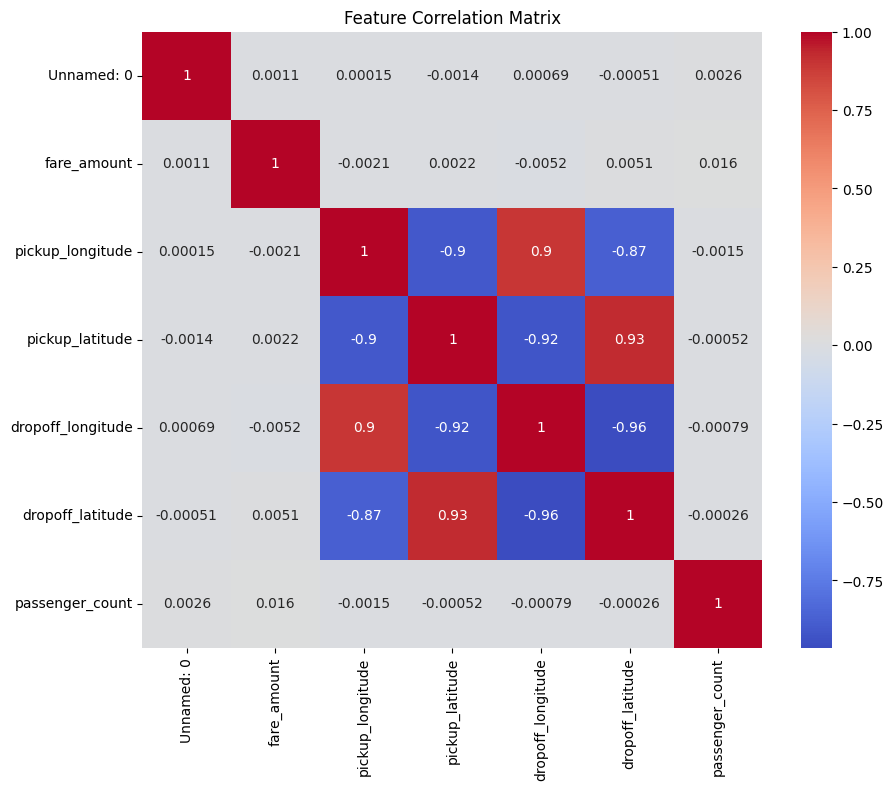

fare_amount          1.000000
passenger_count      0.016315
dropoff_latitude     0.005089
pickup_latitude      0.002167
Unnamed: 0           0.001144
pickup_longitude    -0.002111
dropoff_longitude   -0.005210
Name: fare_amount, dtype: float64

In [13]:
#corelation check
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
corr["fare_amount"].sort_values(ascending=False)

In [25]:
# linear regression and random forest regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

['Unnamed: 0', 'fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


((131781, 5), (32946, 5))

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape
X_test_scaled.shape

(32946, 5)

In [29]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("📊 Linear Regression Results:")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")


📊 Linear Regression Results:
R² Score: 0.0003
RMSE: 2.9494
MAE: 2.4440


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("🌲 Random Forest Results:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")


🌲 Random Forest Results:
R² Score: 0.6499
RMSE: 1.7454
MAE: 1.2830


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


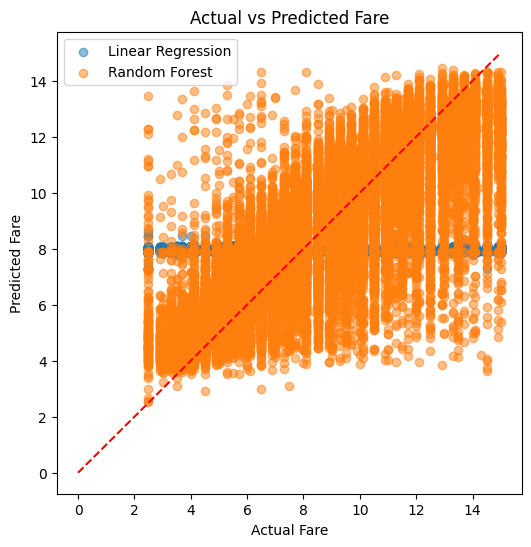

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.legend()
plt.show()
